### Assignment 1  

Given a unicycle bot, apply a control law to trace a line.

Keywords : Line ($45^{\circ}$ w.r.t. x-axis ) tracing without orientation control


In [2]:
######
#  Initializations (Initializations for plotting and ODE solver packages)
######

%matplotlib inline
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


fig_size=[0, 0]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [3]:
###################################
## Defining the unicycle 
###################################

class bot_unicycle(object):
    '''Bot uniclcle class represents a unicylcle model (Diffrential Equations and corresponding solver)'''
    def __init__(self, d, l, ic):
        self.d = d
        self.l = l
        self.X = ic
        self.t1 = 0.0
        print self.X

    def model(self, Y, t, v):
        ''' This is the differential equation function that will be 
        solved for the unicycle '''
        theta_e = Y[-1] 
        x_dot  = v[0]*np.cos(theta_e)
        y_dot  = v[0]*np.sin(theta_e)
        theta_dot = v[1]
        
        return [x_dot, y_dot, theta_dot]
        
    def step(self, dt, v):
        response = integrate.odeint(self.model, self.X, [self.t1, self.t1+dt], args=(v,))
        #print np.shape(response)
        #print response,'"'
        self.X = response[-1,:]
        self.t1 = self.t1 + dt
        return self.X  

[30, 100, 0.9817477042468103]


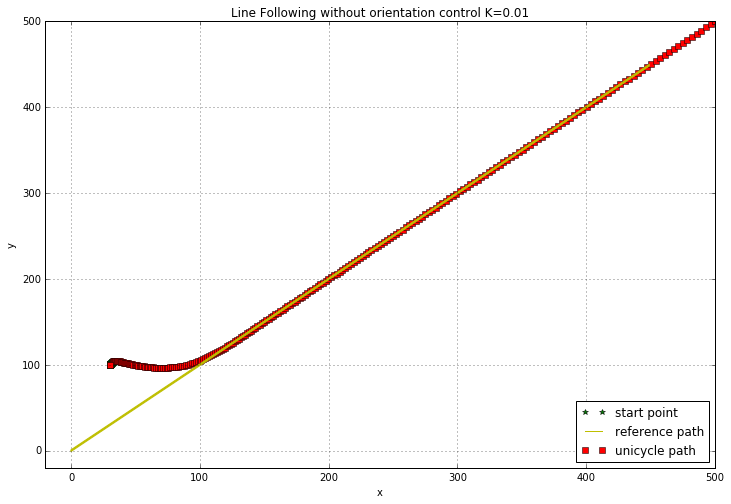

finished


In [26]:

## CHOOSEN VALUE OF GAIN
GAIN = 0.01

## INITIAL CONDITION !!!!!!! 
initial_pose = [30,100,np.pi/3.2]

## CREATING A UNICYCLE INSTANCE
my_bot = bot_unicycle(1, 1, initial_pose) 


## tIME DELTA TO BE USED FOR SIMULATION OF THE ODE
delta = 0.007 

## INITIAL HEADING COMMAND (in degrees)
heading = 0.00

## CONTROL INPUT, WHICH IS A 2 COMPONENT VECTOR {FWD velocity and  theta}
v= [ 3, heading*np.pi/180.0]


## PLOTTING THE START POINT WITH A GREEN SQUARE
plt.plot(initial_pose[0],initial_pose[1],'gs', label='start point')


## REFERENCE HEADING/ COMMAND HEADING
ref_head = 45.0*np.pi/180.0 


## THIS LOOP IS THE SIMULATION
for i in range(250):
    
    ## SOLVING THE ODE FOR EACH DELTA_TIME
    x,y, heading = my_bot.step(i*delta, v)
    
    ## THE FOLLOWING CONDITION ENSURES THAT THE UNICYCLE GETS NO FEEDBACK FOR FIRST 20 STEPS
    if i>20:
        
        ## PLOT THE CURRENT POSITION OF THE UNICYCLE
        plt.plot(x,y,'rs')
        
        
        ## UPDATING THE UNICYCLE PARAMETERS FROM THE ODE RESULTS
        x_pos, y_pos, head = x, y, heading 
        
        ## CALCULATING THE HEADING ERROR
        theta_err = head - ref_head
        
        ## CALCULATING THE DISTANCE FROM THE REFERENCE LINE
        dist = (y_pos - x_pos)/np.sqrt(2.0)
        
        ## THIS IS THE CONTROL LAW
        v[1] = -v[0]*np.tan(theta_err)/l1 - v[0]*GAIN*dist
    else:
        plt.plot(x,y,'gs')
        
ub = [(i,i+1) for i in range(450)]
lb = [(i,i-1) for i in range(450)]


plt.plot(ub,'y-')
plt.plot(lb,'y-')
plt.plot([5],[5],'y-', label='reference path')
plt.plot([30],[100],'rs', label='unicycle path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Following without orientation control K={}'.format(GAIN))
plt.xlim(-20,500)
plt.ylim(-20,500)
plt.grid()
plt.legend(loc=4)
plt.show()
print 'finished'